In [4]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
current_path = os.getcwd()

In [6]:
os.listdir(current_path)

['.gitignore',
 'APP.PY',
 'basic.ipynb',
 'README.md',
 'requirements.txt',
 'run_app.py',
 'skin-disease-datasaet',
 'skindisease.ipynb',
 'skindiseasemodel.h5',
 'temp',
 'templates',
 'test_model.py']

In [7]:
print("total number of BA- cellulitis images:-", len(os.listdir(os.path.join(current_path, 'skin-disease-datasaet', 'images', 'BA- cellulitis'))))

total number of BA- cellulitis images:- 170


In [8]:
image_path =os.path.join(current_path, 'skin-disease-datasaet', 'images')

In [9]:
os.listdir(image_path)

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

In [10]:
path_dict = {'BA- cellulitis':[],
 'BA-impetigo':[],
 'FU-athlete-foot':[],
 'FU-nail-fungus':[],
 'FU-ringworm':[],
 'PA-cutaneous-larva-migrans':[],
 'VI-chickenpox':[],
 'VI-shingles':[]}
for dir in os.listdir(image_path):
    directory_path=os.path.join(image_path, dir)
    for images in os.listdir(directory_path):
        path_dict[dir].append(os.path.join(directory_path,images))

In [11]:
path_dict

{'BA- cellulitis': ['x:\\Ankur  saini\\DS 16 JUNE\\PROJECTS\\skin disease\\skin-disease-datasaet\\images\\BA- cellulitis\\BA- cellulitis (1).jpeg',
  'x:\\Ankur  saini\\DS 16 JUNE\\PROJECTS\\skin disease\\skin-disease-datasaet\\images\\BA- cellulitis\\BA- cellulitis (1).jpg',
  'x:\\Ankur  saini\\DS 16 JUNE\\PROJECTS\\skin disease\\skin-disease-datasaet\\images\\BA- cellulitis\\BA- cellulitis (1).png',
  'x:\\Ankur  saini\\DS 16 JUNE\\PROJECTS\\skin disease\\skin-disease-datasaet\\images\\BA- cellulitis\\BA- cellulitis (1).webp',
  'x:\\Ankur  saini\\DS 16 JUNE\\PROJECTS\\skin disease\\skin-disease-datasaet\\images\\BA- cellulitis\\BA- cellulitis (10).jpeg',
  'x:\\Ankur  saini\\DS 16 JUNE\\PROJECTS\\skin disease\\skin-disease-datasaet\\images\\BA- cellulitis\\BA- cellulitis (10).jpg',
  'x:\\Ankur  saini\\DS 16 JUNE\\PROJECTS\\skin disease\\skin-disease-datasaet\\images\\BA- cellulitis\\BA- cellulitis (100).jpg',
  'x:\\Ankur  saini\\DS 16 JUNE\\PROJECTS\\skin disease\\skin-disease-da

In [12]:
from PIL import Image

In [13]:
path_dict['FU-athlete-foot'][10]

'x:\\Ankur  saini\\DS 16 JUNE\\PROJECTS\\skin disease\\skin-disease-datasaet\\images\\FU-athlete-foot\\FU-athlete-foot (13).jpg'

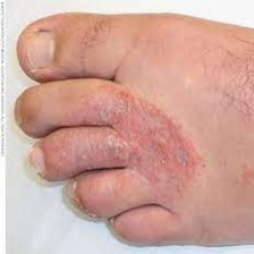

In [14]:
Image.open(path_dict['FU-athlete-foot'][15])

In [15]:
import cv2

In [16]:
path_dict.keys()

dict_keys(['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles'])

In [17]:
path_dict.keys()

dict_keys(['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles'])

In [18]:
img_arr_list = []
labels = []
for key ,val in path_dict.items():
    for path in val:
        img_arr=cv2.imread(path)
        resized_img=cv2.resize(img_arr,(224,224))
        img_arr_list.append(resized_img)
        labels.append(key)

In [19]:
labels

['BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellulitis',
 'BA- cellul

In [20]:
img_arr_list=np.array(img_arr_list)

In [21]:
img_arr_list.shape

(1127, 224, 224, 3)

In [22]:
labels=np.array(labels)

In [23]:
labels.shape

(1127,)

In [24]:
import pandas as pd
import numpy as np 

In [25]:
pd.Series(np.array(labels)).unique()

array(['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot',
       'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans',
       'VI-chickenpox', 'VI-shingles'], dtype=object)

In [26]:
labels

array(['BA- cellulitis', 'BA- cellulitis', 'BA- cellulitis', ...,
       'VI-shingles', 'VI-shingles', 'VI-shingles'], dtype='<U26')

In [27]:
import numpy as np

# Get unique labels
unique_labels = np.unique(labels)

# Create label-to-integer mapping
label_to_int = {label: i for i, label in enumerate(unique_labels)}

# Encode labels using for loop
encoded_labels = []
for label in labels:
    encoded_labels.append(label_to_int[label])

encoded_labels = np.array(encoded_labels)
print(encoded_labels)


[0 0 0 ... 7 7 7]


In [28]:
encoded_labels

array([0, 0, 0, ..., 7, 7, 7])

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_arr_list, encoded_labels, test_size=0.2)

In [30]:
x_train.shape

(901, 224, 224, 3)

In [31]:
x_test.shape

(226, 224, 224, 3)

In [32]:
y_train = np.array(y_train)

In [33]:
y_train.shape

(901,)

In [34]:
y_test = np.array(y_test)

In [35]:
y_test.shape

(226,)

In [36]:
x_train = x_train/255
x_test =  x_test/255

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [38]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 193s 6s/step - accuracy: 0.1515 - loss: 2.1177
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 286s 10s/step - accuracy: 0.1391 - loss: 2.0755
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 264s 9s/step - accuracy: 0.1338 - loss: 2.0697
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 274s 9s/step - accuracy: 0.1510 - loss: 2.0833
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 240s 8s/step - accuracy: 0.1400 - loss: 2.0674
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 243s 8s/step - accuracy: 0.1736 - loss: 2.0590
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 188s 6s/step - accuracy: 0.1446 - loss: 2.0577
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 190s 6s/step - accuracy: 0.1856 - loss: 2.0167
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 237s 8s/step - accuracy: 0.1708 - loss: 2.0491
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 174s 6s/step - accuracy: 0.1823 - loss: 2.0296


In [49]:
pred = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 412ms/step


In [ ]:
pred[0][0]

IndexError: invalid index to scalar variable.

In [41]:
y_test

array([6, 5, 3, 6, 1, 5, 5, 0, 0, 0, 3, 0, 2, 4, 2, 6, 7, 2, 6, 4, 6, 5,
       0, 6, 5, 6, 3, 4, 5, 0, 1, 0, 4, 0, 6, 7, 1, 7, 4, 1, 3, 5, 7, 7,
       6, 4, 5, 3, 7, 0, 5, 7, 7, 6, 0, 2, 0, 0, 4, 3, 4, 3, 4, 6, 3, 2,
       4, 7, 4, 1, 6, 2, 5, 7, 2, 7, 5, 0, 6, 4, 7, 3, 2, 6, 0, 7, 7, 0,
       0, 3, 7, 0, 6, 7, 7, 7, 3, 1, 3, 4, 2, 4, 3, 3, 5, 5, 0, 0, 4, 7,
       6, 0, 0, 2, 5, 4, 7, 7, 4, 2, 5, 6, 4, 7, 1, 0, 1, 0, 3, 7, 4, 3,
       1, 7, 7, 2, 0, 1, 3, 3, 6, 0, 5, 1, 7, 6, 2, 6, 7, 1, 7, 3, 6, 7,
       1, 3, 3, 1, 3, 1, 2, 7, 2, 6, 3, 6, 4, 4, 2, 2, 3, 1, 4, 6, 4, 3,
       4, 3, 4, 0, 0, 3, 6, 6, 5, 3, 6, 3, 6, 3, 1, 2, 0, 7, 1, 3, 3, 6,
       2, 1, 3, 1, 7, 3, 4, 5, 2, 7, 5, 1, 2, 3, 1, 2, 0, 5, 3, 4, 0, 6,
       1, 3, 6, 6, 0, 5])

In [42]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('skindiseasemodel.h5')

In [43]:
pred =model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 307ms/step


from tensorflow.keras.models

In [44]:
pred = [(pred>0.5).astype(int)]

In [45]:
pred[0][0][5]

np.int64(0)

In [46]:
# model.evaluate(x_test, y_test)

In [47]:
model.evaluate(x_train, y_train)

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - accuracy: 0.1596 - loss: 1.9860


[1.9917207956314087, 0.15982241928577423]

In [48]:
pred = [(pred>0.5).astype(int)]

TypeError: '>' not supported between instances of 'list' and 'float'

In [ ]:
model.save('skindiseasemodel.h5')